# Feature Selection and Comparative Analysis

After completing the feature engineering process as described in the `ML_CryptoNews_FE` notebook, this notebook focuses on feature selection and comparative analysis. Our dataset now includes FinBERT sentiment scores, aspect-based sentiments, Word2Vec embeddings, identified topics, and their weights. These features aim to capture the content and sentiment of cryptocurrency news articles, which are important for our prediction task.

## Objective of Feature Selection

The goal of feature selection is to identify the features that have a significant impact on our target variable, "price momentums". We will use various feature selection methods to find the most predictive features. This is important for improving the performance of our machine learning models.

## Comparative Analysis Objective

After feature selection, we will compare different machine learning models. This comparison will help us find the best model for predicting price momentum based on news articles. Crucially, once the optimal model and its parameters are identified through comparison, we will retrain this model on the combined training and validation dataset. This ensures the model is trained on the maximum amount of data available before making the final evaluation on the test set. This approach maximizes the model's ability to learn from the data, providing a more accurate evaluation of its performance on new, unseen data.

## Setup for Feature Selection and Model Comparison

We will start by setting up our environment and reviewing the dataset from the feature engineering phase.

In [1]:
import pandas as pd
import pickle

# Define the path to the enhanced dataset with Word2Vec features
dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/"
enhanced_dataset_with_word_vectors_filename = 'enhanced_df_with_word_vectors.pkl'
full_path_to_enhanced_dataset_with_word_vectors = dataset_path + enhanced_dataset_with_word_vectors_filename

# Load the enhanced DataFrame with Word2Vec features
with open(full_path_to_enhanced_dataset_with_word_vectors, 'rb') as file:
    enhanced_df_with_word_vectors = pickle.load(file)

# Print confirmation
print(f"Enhanced DataFrame with Word2Vec features loaded from {dataset_path}")

# Display the shape and first few rows of the enhanced DataFrame
print("Enhanced DataFrame with Word2Vec Features Shape:", enhanced_df_with_word_vectors.shape)
enhanced_df_with_word_vectors.head()


Enhanced DataFrame with Word2Vec features loaded from C:/Users/adrco/Final_Project-env/Datasets/
Enhanced DataFrame with Word2Vec Features Shape: (8113, 26)


,datetime,text,url,price_momentums,processed_text,Dominant_Topic,Topic_1_Weight,Topic_2_Weight,Topic_3_Weight,Topic_4_Weight,...,Topic_11_Weight,Topic_12_Weight,Topic_13_Weight,Topic_14_Weight,Topic_15_Weight,Dominant_Topic_Label,finBERT_sentiment_score,aspect_sentiments,tokenized_text,word_vector
0,2022-10-14,despite fact blockchainbased carbon credit mar...,https://cryptonews.com/news/bitcoin-price-and-...,1,despite fact blockchainbased carbon credit mar...,2,0.016250,0.541053,0.016250,0.016250,...,0.016250,0.016250,0.016250,0.016250,0.016250,Bitcoin Mining,1,"[(fact, -1), (carbon, -1), (credit, -1), (mark...","[despite, fact, blockchainbased, carbon, credi...","[0.074189804, 0.08830079, -0.01618443, 0.04870..."
1,2022-10-14,trader gained huge kudos space predicting drop...,https://cryptonews.com/news/bitcoin-price-pred...,1,trader gained huge kudos space predicting drop...,2,0.016348,0.600144,0.016348,0.016348,...,0.016348,0.016348,0.016348,0.016348,0.016348,Bitcoin Mining,-1,"[(trader, -1), (kudos, -1), (space, -1), (drop...","[trader, gained, huge, kudos, space, predictin...","[0.10852058, 0.07451202, -0.031024793, 0.10725..."
2,2022-10-14,always worked sticking plan clear invalidation...,https://cryptonews.com/news/bitcoin-price-pred...,1,always worked sticking plan clear invalidation...,7,0.018534,0.018534,0.018534,0.018534,...,0.018534,0.313945,0.018534,0.018534,0.018534,Technical Analysis,0,"[(plan, 0), (invalidation, 0), (invalidation, ...","[always, worked, sticking, plan, clear, invali...","[0.07917403, 0.055064432, -0.0067611514, 0.098..."
3,2022-10-14,fact broke level system giving bullish signals...,https://cryptonews.com/news/bitcoin-price-pred...,1,fact broke level system giving bullish signals...,11,0.016822,0.016822,0.016822,0.016822,...,0.464527,0.016822,0.016822,0.016822,0.016822,Market Sentiment,0,"[(fact, 1), (level, 1), (system, 1), (signals,...","[fact, broke, level, system, giving, bullish, ...","[0.16005856, 0.03238435, -0.056046773, 0.13209..."
4,2022-10-14,demand coming confirms theres fuel keep going ...,https://cryptonews.com/news/bitcoin-price-pred...,1,demand coming confirms theres fuel keep going ...,11,0.127245,0.017505,0.017505,0.017505,...,0.489102,0.173597,0.017505,0.017505,0.017505,Market Sentiment,-1,"[(demand, -1), (fuel, -1), (squeeze, -1), (21k...","[demand, coming, confirms, theres, fuel, keep,...","[0.097828545, 0.07860845, 0.008878434, 0.11065..."


### Exclusion and Inclusion of Features for Analysis

As we move forward with feature selection techniques, it's crucial to outline the features we've decided to include and exclude from our analysis to optimize the predictive power for "price momentums". 

#### Excluded Features:
- `datetime`: While it provides valuable temporal context, it does not directly predict "price momentums."
- `url`: Acts as a unique identifier for articles but lacks direct predictive value.
- `text`: The raw text has been transformed into more analytically useful formats, thus is excluded.
- `processed_text` and `tokenized_text`: Although they represent cleaner versions of the original articles, we've chosen to focus on numerical and vectorized representations for our predictive model.
- `Dominant_Topic_Label`: While providing human-readable labels for the dominant topics, we are prioritizing numerical representations and derived metrics for our analysis.

#### Included Features:
- `price_momentums`: Our target variable.
- `Dominant_Topic`: Offers insights into the main subject of the articles, which could influence the price momentum.
- `finBERT_sentiment_score`: Provides sentiment analysis specific to the financial domain, likely relevant for predicting market movements.
- `aspect_sentiments`: Provides a list of tuples, each containing an aspect mentioned in the text and its corresponding sentiment score. This feature offers a finer-grained sentiment analysis by identifying specific aspects of the cryptocurrency market within each article and evaluating their sentiment (positive, neutral, negative). This detailed sentiment analysis could offer deeper insights into the factors influencing "price momentums."
- `word_vector`: Derived from Word2Vec embeddings, encapsulates the semantic meaning of the articles in a format suitable for machine learning.
- `Topic_X_Weight` for X in 1 to 15: Represents the weight of topics identified in each article, which can be crucial for understanding the content's impact on price momentums.

By focusing on these selected features, we aim to enhance our model's ability to predict "price momentums" effectively, reducing the dataset's dimensionality and potentially improving performance.

In [2]:
import pandas as pd
import pickle

# List of columns to keep
columns_to_keep = [
    'price_momentums', 
    'Dominant_Topic',     
    'finBERT_sentiment_score', 
    'aspect_sentiments', 
    'word_vector'
] + [f'Topic_{i}_Weight' for i in range(1, 16)]  # Dynamically add 'Topic_X_Weight' columns for X in 1 to 15

# Create a new DataFrame with only the selected columns
selected_df = enhanced_df_with_word_vectors[columns_to_keep]

# Saving the selected DataFrame to a pickle file using dataset_path
selected_df_filename = 'selected_df.pkl'
with open(dataset_path + selected_df_filename, 'wb') as file:
    pickle.dump(selected_df, file)

# Print confirmation using dataset_path
print(f"Selected DataFrame saved to {dataset_path} as {selected_df_filename}")


Selected DataFrame saved to C:/Users/adrco/Final_Project-env/Datasets/ as selected_df.pkl


## Feature Selection Techniques

Feature selection is crucial for enhancing model performance by reducing the number of input variables to those most predictive of the target variable. In this section, we will apply various feature selection techniques to identify the most impactful features for our models.


In [3]:
import pandas as pd
import pickle

# Expand the 'word_vector' into separate columns
word_vectors_df = pd.DataFrame(selected_df['word_vector'].tolist())

# Adjust the columns naming to start from 'word_vector_1' instead of 'word_vector_0'
word_vectors_df.columns = [f'word_vector_{i+1}' for i in range(word_vectors_df.shape[1])]

# Concatenate the expanded word vectors with the rest of the DataFrame, excluding the original 'word_vector' column
selected_df_with_word_vector_columns = pd.concat([selected_df.drop('word_vector', axis=1), word_vectors_df], axis=1)

# Define the path for saving the expanded DataFrame
dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/"
selected_df_with_word_vector_columns_filename = 'selected_df_with_word_vector_columns.pkl'

# Save the expanded DataFrame to a pickle file
with open(dataset_path + selected_df_with_word_vector_columns_filename, 'wb') as file:
    pickle.dump(selected_df_with_word_vector_columns, file)

# Print confirmation
print(f"Expanded DataFrame saved to {dataset_path} as {selected_df_with_word_vector_columns_filename}")


Expanded DataFrame saved to C:/Users/adrco/Final_Project-env/Datasets/ as selected_df_with_word_vector_columns.pkl


In [4]:
# Print only the newly added word vector columns from the first few rows

word_vector_columns_only = selected_df_with_word_vector_columns.filter(like='word_vector_')
print(word_vector_columns_only.head())


   word_vector_1  word_vector_2  word_vector_3  word_vector_4  word_vector_5  \
0       0.074190       0.088301      -0.016184       0.048700       0.089106   
1       0.108521       0.074512      -0.031025       0.107255       0.068751   
2       0.079174       0.055064      -0.006761       0.099000       0.078358   
3       0.160059       0.032384      -0.056047       0.132094       0.066462   
4       0.097829       0.078608       0.008878       0.110655       0.088570   

   word_vector_6  word_vector_7  word_vector_8  word_vector_9  word_vector_10  \
0      -0.086595       0.095258       0.223363       0.043605       -0.109508   
1      -0.081720       0.051361       0.275266       0.032980       -0.043619   
2      -0.074314       0.015408       0.225446       0.046267        0.006505   
3      -0.072389      -0.010606       0.217996       0.050923       -0.009032   
4      -0.080711       0.013683       0.219512       0.095026       -0.002620   

   ...  word_vector_291  word_ve

### Interpretation of Word Vector Columns

The displayed DataFrame excerpt showcases the first few rows of our dataset with the expanded word vector columns, ranging from `word_vector_1` to `word_vector_300`. Each `word_vector_*` column represents a dimension in the 300-dimensional space generated by the Word2Vec model. These vectors encapsulate the semantic meaning of the cryptocurrency news articles in a numerical format that machine learning models can process.

- **Positive and Negative Values**: The values in each `word_vector_*` column can be positive or negative, indicating the direction of each dimension in the vector space relative to the model's learned context.
- **Magnitude**: The magnitude of the values reflects the weight or importance of that dimension in the context of the article's content. Larger absolute values indicate stronger associations with particular semantic features captured by the model.
- **Diversity in Vectors**: Variations across rows for the same `word_vector_*` column demonstrate how different articles have different semantic embeddings. This diversity is crucial for the model to learn from the nuances in the data.
- **Application**: These word vectors serve as input features for predictive models, enabling them to leverage deep, contextual insights from the text data to make accurate predictions about "price momentums."

We can now proceed with data preparation.


In [5]:
# Import necessary libraries for feature selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target variable (y)
X = selected_df_with_word_vector_columns.drop(['price_momentums'], axis=1)
y = selected_df_with_word_vector_columns['price_momentums']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
import os
import pickle

# Define the path for saving the split datasets
split_dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/Splits/"

# Save training data
train_filename = 'X_train.pkl'
with open(split_dataset_path + train_filename, 'wb') as file:
    pickle.dump(X_train, file)
print(f"Training features saved to {split_dataset_path} as {train_filename}")

train_target_filename = 'y_train.pkl'
with open(split_dataset_path + train_target_filename, 'wb') as file:
    pickle.dump(y_train, file)
print(f"Training target saved to {split_dataset_path} as {train_target_filename}")

# Save testing data
test_filename = 'X_test.pkl'
with open(split_dataset_path + test_filename, 'wb') as file:
    pickle.dump(X_test, file)
print(f"Testing features saved to {split_dataset_path} as {test_filename}")

test_target_filename = 'y_test.pkl'
with open(split_dataset_path + test_target_filename, 'wb') as file:
    pickle.dump(y_test, file)
print(f"Testing target saved to {split_dataset_path} as {test_target_filename}")

Training features saved to C:/Users/adrco/Final_Project-env/Datasets/Splits/ as X_train.pkl
Training target saved to C:/Users/adrco/Final_Project-env/Datasets/Splits/ as y_train.pkl
Testing features saved to C:/Users/adrco/Final_Project-env/Datasets/Splits/ as X_test.pkl
Testing target saved to C:/Users/adrco/Final_Project-env/Datasets/Splits/ as y_test.pkl


### Feature Selection Techniques

Having split our dataset, the next step is to apply feature selection techniques. This process involves identifying the most relevant features that contribute to our predictive modeling task. Effective feature selection not only improves the performance of our models but also reduces complexity and computational costs. We will explore several feature selection methods to refine our feature set further.

### Update on Aspect Sentiment Feature

Upon further analysis, we realized that the `aspect_sentiment` feature in its original format (lists of tuples) is not directly suitable for feature selection techniques such as `SelectKBest` with `f_classif`. These methods require numerical or categorical data, and the complex structure of `aspect_sentiment` does not fit these requirements. To address this, we will transform `aspect_sentiment` into derived numerical features that summarize the sentiment analysis results. This step will allow us to include sentiment analysis insights in a format compatible with our feature selection and machine learning models.


In [7]:
def weighted_sentiment_score(aspect_sentiments_list):
    if not aspect_sentiments_list:  # Check for empty lists
        return 0
    total_score = sum(sentiment for _, sentiment in aspect_sentiments_list)
    return total_score / len(aspect_sentiments_list)

def sentiment_distribution(aspect_sentiments_list):
    counts = [0, 0, 0]  # Positive, Neutral, Negative
    for _, sentiment in aspect_sentiments_list:
        if sentiment == 1:
            counts[0] += 1
        elif sentiment == 0:
            counts[1] += 1
        elif sentiment == -1:
            counts[2] += 1
    total = sum(counts)
    if total == 0:  # Avoid division by zero for empty lists
        return [0, 0, 0]
    return [count / total for count in counts]


In [8]:
# Apply the functions to calculate new sentiment summary features
selected_df_with_word_vector_columns['weighted_sentiment_score'] = selected_df_with_word_vector_columns['aspect_sentiments'].apply(weighted_sentiment_score)

summary_columns = pd.DataFrame(selected_df_with_word_vector_columns['aspect_sentiments'].apply(sentiment_distribution).tolist(), columns=['positive_sentiment_prop', 'neutral_sentiment_prop', 'negative_sentiment_prop'])
selected_df_with_word_vector_columns = pd.concat([selected_df_with_word_vector_columns, summary_columns], axis=1)

# Renaming df
selected_df_final = selected_df_with_word_vector_columns


In [9]:

# Explicitly drop the 'aspect_sentiments' column from the DataFrame
selected_df_final = selected_df_with_word_vector_columns.drop('aspect_sentiments', axis=1)

# Save the updated DataFrame without the 'aspect_sentiments' column
final_filename = 'selected_df_final.pkl'
with open(dataset_path + final_filename, 'wb') as file:
    pickle.dump(selected_df_final, file)

print(f"Updated DataFrame without 'aspect_sentiments' saved in {dataset_path} as {final_filename}")



Updated DataFrame without 'aspect_sentiments' saved in C:/Users/adrco/Final_Project-env/Datasets/ as selected_df_final.pkl


In [10]:
selected_df_final.head()

,price_momentums,Dominant_Topic,finBERT_sentiment_score,Topic_1_Weight,Topic_2_Weight,Topic_3_Weight,Topic_4_Weight,Topic_5_Weight,Topic_6_Weight,Topic_7_Weight,...,word_vector_295,word_vector_296,word_vector_297,word_vector_298,word_vector_299,word_vector_300,weighted_sentiment_score,positive_sentiment_prop,neutral_sentiment_prop,negative_sentiment_prop
0,1,2,1,0.016250,0.541053,0.016250,0.016250,0.247697,0.016250,0.016250,...,0.192414,0.205468,0.122130,-0.111298,0.151214,-0.101755,0.272727,0.636364,0.0,0.363636
1,1,2,-1,0.016348,0.600144,0.016348,0.016348,0.187334,0.016348,0.016348,...,0.210004,0.212736,0.034420,-0.154470,0.127246,-0.006571,-0.555556,0.222222,0.0,0.777778
2,1,7,0,0.018534,0.018534,0.018534,0.018534,0.018534,0.018534,0.325636,...,0.148383,0.146488,0.018948,-0.115619,0.073645,0.053953,0.000000,0.000000,1.0,0.000000
3,1,11,0,0.016822,0.016822,0.016822,0.016822,0.016822,0.016822,0.316788,...,0.213694,0.194968,0.058516,-0.163716,0.087066,0.001686,0.800000,0.900000,0.0,0.100000
4,1,11,-1,0.127245,0.017505,0.017505,0.017505,0.017505,0.017505,0.017505,...,0.144356,0.180643,0.010803,-0.151766,0.045411,0.032230,-1.000000,0.000000,0.0,1.000000


### Confirmation of Sentiment Summary Features

The transformation of the `aspect_sentiments` data into numerical features has been successfully completed. Our dataset now includes the following new columns derived from the original `aspect_sentiments` information:

- `weighted_sentiment_score`: Represents the average sentiment score across all aspects mentioned in an article, providing a single metric that summarizes the overall sentiment.
- `positive_sentiment_prop`: The proportion of positive sentiments among all aspect sentiments within an article, offering insight into the positivity of the discourse.
- `neutral_sentiment_prop`: The proportion of neutral sentiments, indicating the extent of neutral or unbiased discussion in the content.
- `negative_sentiment_prop`: The proportion of negative sentiments, highlighting the degree of negative sentiment or criticism present.

These additions enrich our dataset with detailed sentiment analysis, allowing for a more nuanced understanding of the factors influencing "price momentums". With these new features, our dataset is better equipped for the upcoming feature selection and machine learning modeling phases.


### Resplitting and Resaving Data Splits

In [11]:
from sklearn.model_selection import train_test_split
import os
import pickle

# Remove duplicate columns before the split (3 last columns were doubles)
selected_df_final = selected_df_final.loc[:,~selected_df_final.columns.duplicated()]

# Define features (X) and target (y) again, now with the updated dataset
X = selected_df_final.drop(['price_momentums'], axis=1)
y = selected_df_final['price_momentums']

# Resplit the dataset into training and testing sets, ensuring a consistent test size and random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the path for saving the split datasets
split_dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/Splits/"

# Save the updated training and testing sets, ensuring the file names clearly indicate they are the most current splits
split_filenames = ['X_train_updated.pkl', 'X_test_updated.pkl', 'y_train_updated.pkl', 'y_test_updated.pkl']
split_data = [X_train, X_test, y_train, y_test]

for filename, data in zip(split_filenames, split_data):
    with open(os.path.join(split_dataset_path, filename), 'wb') as file:
        pickle.dump(data, file)
    print(f"{filename} saved to {split_dataset_path}")


X_train_updated.pkl saved to C:/Users/adrco/Final_Project-env/Datasets/Splits/
X_test_updated.pkl saved to C:/Users/adrco/Final_Project-env/Datasets/Splits/
y_train_updated.pkl saved to C:/Users/adrco/Final_Project-env/Datasets/Splits/
y_test_updated.pkl saved to C:/Users/adrco/Final_Project-env/Datasets/Splits/


## Implementing Feature Selection

With our dataset now fully prepared, we're ready to proceed with feature selection, helping to identify the most important features that contribute to our predictive modeling task.

By applying `SelectKBest` with the `f_classif` score function, we aim to select the top `k` features based on their statistical significance in relation to the target variable, "price momentums". This process not only enhances model interpretability by focusing on relevant features but also improves model performance by reducing complexity and potential overfitting.

Let's identify the most predictive features in our dataset.

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Filenames for the saved datasets
split_filenames = ['X_train_updated.pkl', 'X_test_updated.pkl', 'y_train_updated.pkl', 'y_test_updated.pkl']

# Loading the datasets
X_train = pd.read_pickle(f"{split_dataset_path}{split_filenames[0]}")
X_test = pd.read_pickle(f"{split_dataset_path}{split_filenames[1]}")
y_train = pd.read_pickle(f"{split_dataset_path}{split_filenames[2]}")
y_test = pd.read_pickle(f"{split_dataset_path}{split_filenames[3]}")

# Apply SelectKBest class to extract top 'k' best features
k = 100  # Adjusted 'k' based on initial choice and refine later as needed
bestfeatures = SelectKBest(score_func=f_classif, k=k)
fit = bestfeatures.fit(X_train, y_train)

# Get the scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Concat two dataframes for better visualization and print the best features
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
# Sorting the features by score
featureScores = featureScores.sort_values(by='Score', ascending=False).reset_index(drop=True)

print(featureScores.head(k))  # Adjust to display 'k' or a specific number of top features


            Feature      Score
0   word_vector_291  63.626212
1   word_vector_137  57.493479
2    word_vector_99  47.597863
3   word_vector_279  47.221868
4   word_vector_244  46.421104
..              ...        ...
95   word_vector_65  11.567412
96  word_vector_270  11.211858
97   word_vector_11  11.118837
98  word_vector_249  11.115587
99   word_vector_63  11.050070

[100 rows x 2 columns]


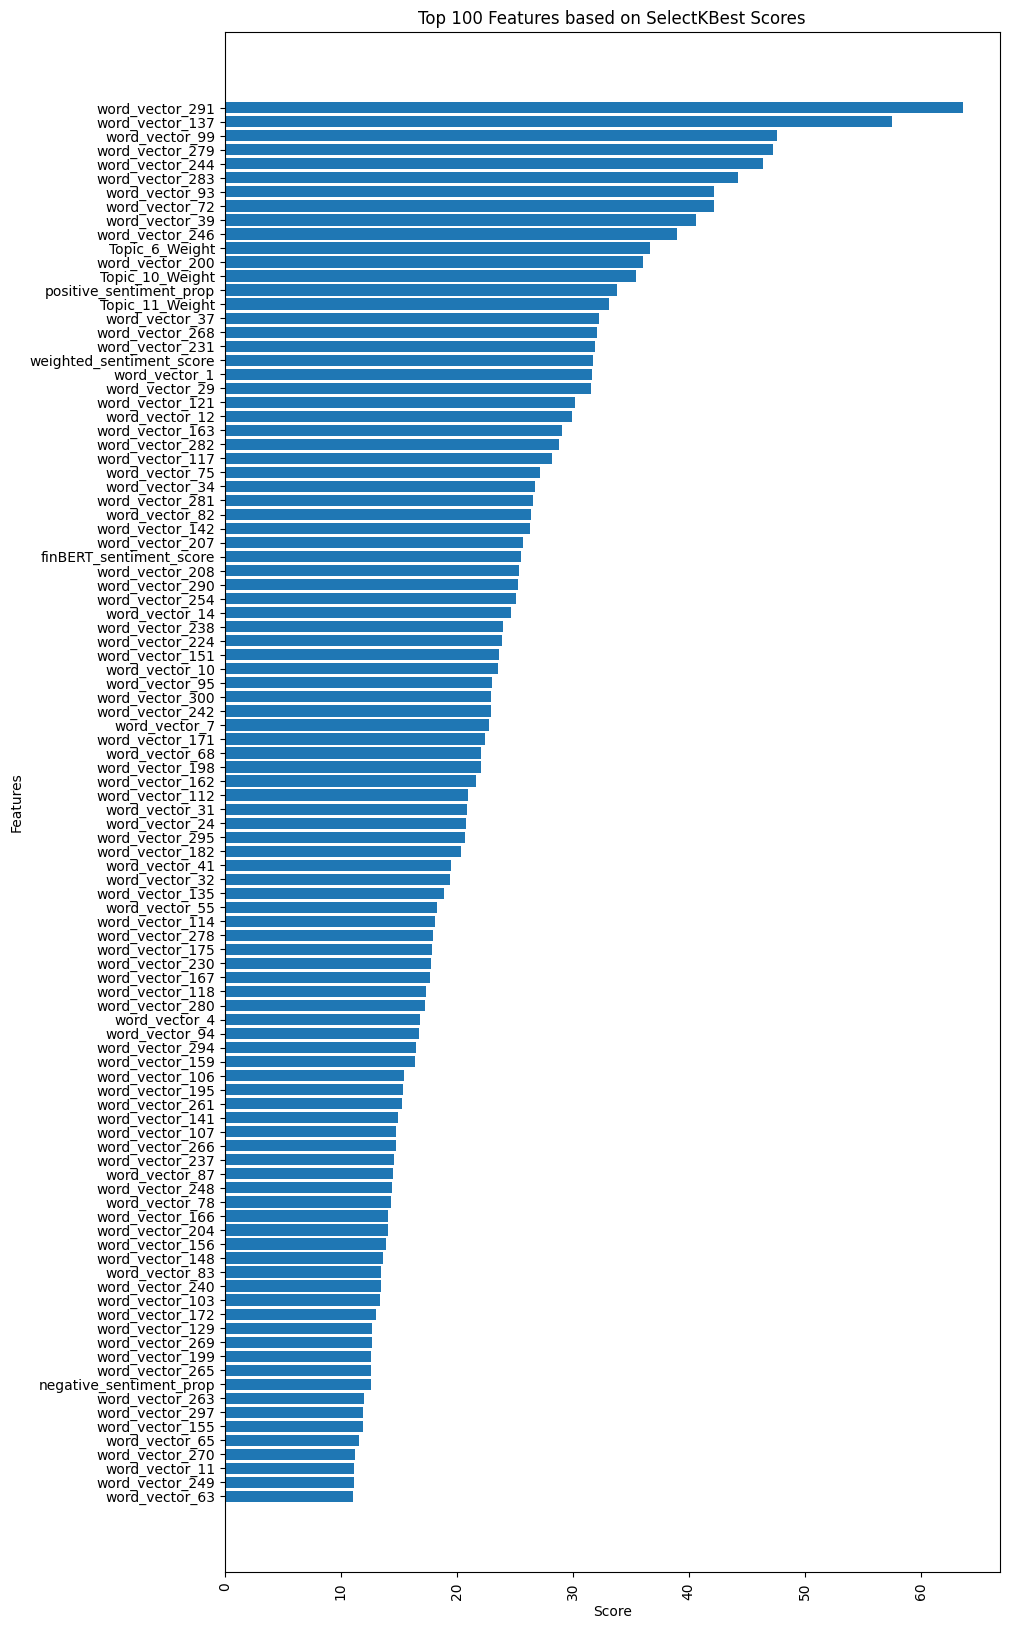

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))  
top_k_features = featureScores.nlargest(k, 'Score')
plt.barh(top_k_features['Feature'], top_k_features['Score'])
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Top 100 Features based on SelectKBest Scores')
plt.gca().invert_yaxis()
plt.xticks(rotation=90)  
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()


### Interpretation of Feature Importance from SelectKBest

The output of the `SelectKBest` method provides us with a valuable look into which features have the most statistical significance in relation to the target variable `price_momentums`. The feature importance scores are derived from univariate statistical tests between each feature and the target variable.

- **Top Feature**: The feature `word_vector_137` stands out with the highest score of approximately 63.62, indicating it has the strongest individual relationship with `price_momentums` among all the features evaluated.
- **Word Vectors Dominance**: The majority of the top features are word vectors, which aligns with the expectation that the language used in cryptocurrency news articles contains predictive signals for price movements. 
- **Scores Above and Below 50**: While there is a significant drop in scores after the first feature, the scores above 10 still suggest a degree of relevance. It's important to note that the effectiveness of features should not be assessed in isolation, as their combined effect can be substantial when used in a predictive model.
- **Non-Vector Features**: Among the top features, we see the presence of `positive_sentiment_prop` and `weighted_sentiment_score` features. This suggests that sentiment analysis metrics, which provide a summary of the sentiment in the articles, also play a significant role in predicting price movements.
- **Plot Interpretation**: The bar chart visualization helps us quickly identify which features stand out based on their scores. The length of the bars correlates with the strength of the relationship to the target variable. The plot confirms that the word vector features are prominent, but it also emphasizes that non-vector features related to sentiment are among the top predictors.

Overall, the `SelectKBest` results and the plot provide a starting point for feature selection. However, it is essential to remember that these scores are based on univariate statistical tests. The real test of feature effectiveness will come when we train our machine learning models, which can account for complex interactions between features that `SelectKBest` cannot capture.

We should proceed with caution and consider using these features as candidates for further modeling and evaluation. The next steps would involve using these features in a machine learning model and evaluating their predictive power in combination through model-specific feature importance measures and predictive performance metrics.

## Model Training and Evaluation with Logistic Regression

With the dataset prepared and the feature selection process completed, the next step is to train a machine learning model. Logistic Regression is chosen for this task due to its efficiency and effectiveness in binary classification problems. The process involves the following steps: splitting the training dataset into training and validation sets, training the logistic regression model, evaluating its performance on the validation set, tuning the model parameters with GridSearchCV, and finally, evaluating the best model on the test set.


### Splitting the Training Data

The training data is further split into training and validation sets. This allows for the evaluation of the model's performance on unseen data before the final testing phase.


In [14]:
import os
import pickle
from sklearn.model_selection import train_test_split

# Splitting the data
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set size:", X_train_new.shape)
print("Validation set size:", X_val.shape)

# Define the path for saving the split datasets
split_train_val_dataset_path = r"C:\Users\adrco\Final_Project-env\Datasets\Splits\Train_Val"

# Filenames for the newly split datasets
split_train_val_filenames = ['X_train_new.pkl', 'X_val.pkl', 'y_train_new.pkl', 'y_val.pkl']
split_train_val_datasets = [X_train_new, X_val, y_train_new, y_val]

# Save the datasets
for filename, dataset in zip(split_train_val_filenames, split_train_val_datasets):
    with open(os.path.join(split_train_val_dataset_path, filename), 'wb') as file:
        pickle.dump(dataset, file)
    print(f"Saved {filename} to {split_train_val_dataset_path}")


Training set size: (5192, 321)
Validation set size: (1298, 321)
Saved X_train_new.pkl to C:\Users\adrco\Final_Project-env\Datasets\Splits\Train_Val
Saved X_val.pkl to C:\Users\adrco\Final_Project-env\Datasets\Splits\Train_Val
Saved y_train_new.pkl to C:\Users\adrco\Final_Project-env\Datasets\Splits\Train_Val
Saved y_val.pkl to C:\Users\adrco\Final_Project-env\Datasets\Splits\Train_Val


### Logistic Regression Model Training

We will now train a logistic regression model using the newly created training set. This model will initially be evaluated on the validation set to assess its performance.


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.70      0.64       696
           1       0.57      0.45      0.50       602

    accuracy                           0.58      1298
   macro avg       0.58      0.58      0.57      1298
weighted avg       0.58      0.58      0.58      1298



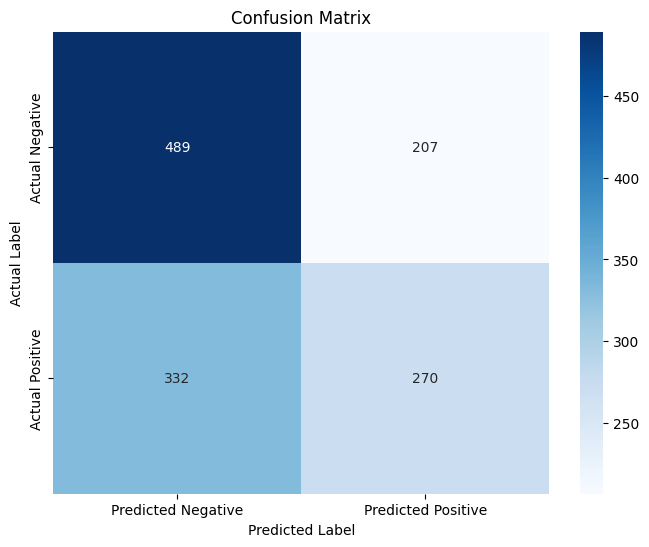

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_new, y_train_new)

# Predict on the validation set
y_val_pred = logreg.predict(X_val)

# Initial evaluation of the model on the validation set using classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Visualizing the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


### Model Performance Interpretation On Train Set

The logistic regression model's performance, as indicated by the classification report and confusion matrix, shows a moderate level of accuracy:

- **Accuracy**: The model has an overall accuracy of 58%, which implies that it correctly predicts the target variable for 58% of the validation set.

- **Precision**: The precision for predicting class '0' (negative) is 60%, and for class '1' (positive) is 57%. This means that when the model predicts class '0', it is correct 60% of the time, and for class '1', 57% of the time.

- **Recall**: The recall (or sensitivity) for class '0' is 70%, indicating that it can correctly identify 70% of the actual class '0' instances. For class '1', the recall is 45%, meaning it correctly identifies 45% of the actual class '1' instances.

- **F1-Score**: The F1-score, which balances precision and recall, is 0.64 for class '0' and 0.50 for class '1'. These scores suggest that the model is better at identifying class '0' instances than class '1'.

The confusion matrix further illustrates the model's tendency to predict class '0' more accurately than class '1', with a higher number of true negatives (489) compared to true positives (270). There are also a significant number of false negatives (332), where class '1' is incorrectly predicted as class '0'.

In summary, while the model demonstrates some ability to distinguish between the classes, there is considerable room for improvement, particularly in correctly identifying class '1' instances and overall predictive performance.

### Hyperparameter Tuning with GridSearchCV

To optimize our logistic regression model, we will use GridSearchCV to search for the best combination of hyperparameters.


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Define the parameter grid for logistic regression
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs']
}

# Create a pipeline that will scale the data and then apply logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000, random_state=42))

# Initialize the GridSearchCV object with the pipeline
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=10)

# Perform the grid search on the new training set
grid_search.fit(X_train_new, y_train_new)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'logisticregression__C': 100, 'logisticregression__solver': 'lbfgs'}


### Hyperparameter Tuning with LogisticRegressionCV

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)

# Using LogisticRegressionCV with the 'lbfgs' solver and scaled data
logreg_cv = LogisticRegressionCV(Cs=50, cv=5, random_state=42, solver='lbfgs', max_iter=5000, verbose=10)
logreg_cv.fit(X_train_scaled, y_train_new)

# Best parameter 'C' after LogisticRegressionCV
print("Best C found:", logreg_cv.C_[0])



[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   23.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  1.6min


Best C found: 159.98587196060572


### Interpretation of Hyperparameter Optimization Results

The hyperparameter optimization process was conducted using two different methods: `GridSearchCV` and `LogisticRegressionCV`. Each method aims to identify the best hyperparameters for the Logistic Regression model, but they use different approaches and thus may yield different results.

### GridSearchCV Results
The `GridSearchCV` method tested a grid of predefined hyperparameters and found that the model achieved the best performance with a regularization strength `C` of 100 when using the 'lbfgs' solver. The 'lbfgs' solver is known for being robust and efficient on datasets with a large number of samples and is the default solver in scikit-learn's Logistic Regression implementation. A `C` value of 100 indicates a preference for more regularization, which suggests that the model benefits from less complexity, possibly due to a high variance in the dataset.

### LogisticRegressionCV Results
On the other hand, `LogisticRegressionCV` uses a cross-validated approach to determine the best `C` value along a regularization path. It found the optimal `C` value to be approximately 159.98587196060572, which is significantly higher than the best `C` found by `GridSearchCV`. This larger `C` value from `LogisticRegressionCV` further emphasizes the model's preference for lower regularization strength, suggesting that retaining more features is crucial for making accurate predictions in this context.

### Conclusion
Both methods suggest that a lower level of regularization (higher `C` value) is optimal for the given dataset, indicating that a more complex model with less shrinkage of the coefficients leads to better performance. It is essential to validate these findings by evaluating the model's performance on a hold-out test set. Final model selection should consider not only the optimization metric (e.g., accuracy) but also the practical aspects of the model's use case, such as interpretability, computational efficiency, and how it aligns with the business objectives.

### Further Assessment of Feature Importance

In addition to the earlier univariate feature selection with `SelectKBest`, we will now further analyze the importance of features using the coefficients from a fitted logistic regression model. This model-based approach takes into account the relationships between features, potentially offering a different perspective on which features are most predictive.

We will compare the insights gained from this approach with the results from `SelectKBest` to make an informed decision on whether dimensionality reduction through PCA would be beneficial for our model.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)

# Train Logistic Regression model with the best parameters found
logreg = LogisticRegression(C=159.98587196060572, solver='lbfgs', max_iter=5000, random_state=42)  # Adjust C and solver as per the best parameters
logreg.fit(X_train_scaled, y_train_new)

# Assess feature importance
# Logistic Regression coefficients as feature importance
importance = logreg.coef_[0]

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))


Feature: 0, Score: 0.13883
Feature: 1, Score: 0.03625
Feature: 2, Score: 0.10058
Feature: 3, Score: 0.03635
Feature: 4, Score: 0.09713
Feature: 5, Score: 0.15681
Feature: 6, Score: 0.10342
Feature: 7, Score: 0.00809
Feature: 8, Score: 0.10574
Feature: 9, Score: -0.01163
Feature: 10, Score: 0.01653
Feature: 11, Score: 0.00125
Feature: 12, Score: -0.14051
Feature: 13, Score: -0.05735
Feature: 14, Score: -0.18430
Feature: 15, Score: -0.03614
Feature: 16, Score: -0.12516
Feature: 17, Score: 1.81771
Feature: 18, Score: -4.21920
Feature: 19, Score: -1.51533
Feature: 20, Score: 2.77459
Feature: 21, Score: -1.26356
Feature: 22, Score: -0.73534
Feature: 23, Score: 2.91486
Feature: 24, Score: 2.07591
Feature: 25, Score: 0.35344
Feature: 26, Score: 2.44261
Feature: 27, Score: -3.91273
Feature: 28, Score: -0.73144
Feature: 29, Score: -4.51724
Feature: 30, Score: 2.24495
Feature: 31, Score: -5.75873
Feature: 32, Score: 0.20936
Feature: 33, Score: 2.36650
Feature: 34, Score: -2.01944
Feature: 35, Sc

### Interpretation of Logistic Regression Coefficients as Feature Importance

The logistic regression model provides coefficients as a measure of feature importance. The magnitude of these coefficients represents the strength of the association between each feature and the target variable 'price_momentums'. A positive sign indicates a positive correlation with the likelihood of the positive class, while a negative sign indicates a negative correlation.


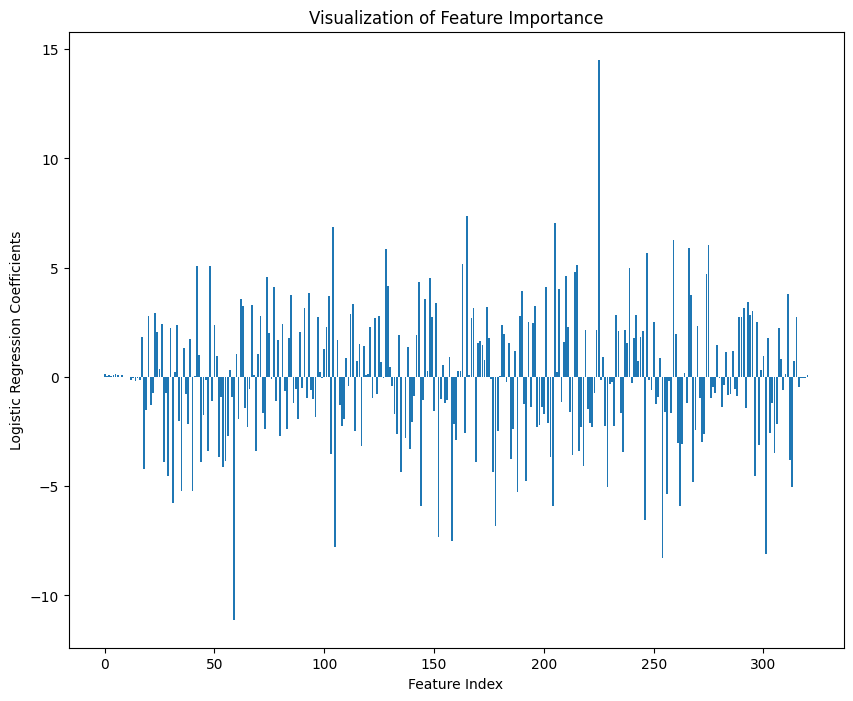

In [19]:
# Plotting the feature importances 
plt.figure(figsize=(10, 8))
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature Index')
plt.ylabel('Logistic Regression Coefficients')
plt.title('Visualization of Feature Importance')
plt.show()


**Interpretation:** Coefficients close to zero suggest a feature has little impact on the model's predictions, whereas larger coefficients (positive or negative) suggest a stronger impact. A positive sign indicates a positive correlation with the predicted class, and a negative sign indicates a negative correlation.

**Magnitude:** The magnitude of the coefficients indicates the strength of the impact. The features seem to vary widely in importance, with some coefficients being relatively high (greater than 1 or less than -1), indicating that they have a significant impact on the model's predictions.

**Top Features:** From the list, it appears that features such as 18, 35, 48, 59, 105, 225, and several others have particularly large coefficients (both positive and negative), indicating they are likely to be strong predictors.

### Conclusions

We have determined the best hyperparameters for our Logistic Regression model and assessed the importance of each feature. Our next steps are as follows:

**Retraining with Best Parameters:** We will retrain the Logistic Regression model using the identified best parameters on the combined training and validation dataset. This ensures that the model leverages the full scope of training data available.

**Performance Evaluation:** After retraining, we will evaluate the model's performance on the test set. This evaluation will provide an unbiased estimate of the model's predictive capability on new, unseen data.

**Satisfaction Check:** If the model's performance on the test set meets our expectations and aligns with the project's objectives, we will consider the modeling task complete.

**Feature Elimination Consideration:** Should the model's performance fall short of expectations, or if there is a need for a more interpretable model, we will consider eliminating features deemed non-important by our feature importance analysis. We will then retrain the model to determine if performance can be maintained or improved with a reduced feature set.

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       827
           1       0.59      0.49      0.53       796

    accuracy                           0.58      1623
   macro avg       0.58      0.58      0.58      1623
weighted avg       0.58      0.58      0.58      1623



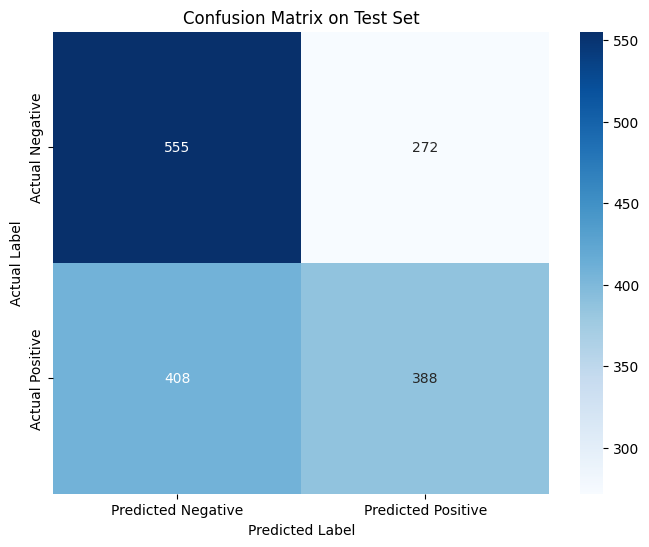

In [20]:
# Retrain Logistic Regression Model with Best Parameters
from sklearn.linear_model import LogisticRegression

# Best parameters found
best_params = {'C': 159.98587196060572, 'solver': 'lbfgs'}
logreg_optimized = LogisticRegression(**best_params, max_iter=5000, random_state=42)

# Combine training and validation sets for final model training
X_combined = pd.concat([X_train_new, X_val])
y_combined = pd.concat([y_train_new, y_val])

# Retrain the model
logreg_optimized.fit(X_combined, y_combined)

# Performance Evaluation on Test Set
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_test_pred = logreg_optimized.predict(X_test)

# Evaluation metrics
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix on Test Set')
plt.show()


### Interpretation of Model Performance on Test Set

The performance of the Logistic Regression model on the test set has given us a mixed outcome. The model achieved an accuracy of 0.58, with a precision of 0.58 for the negative class and 0.59 for the positive class. The recall scores indicate the model is better at identifying the negative class (0.67) than the positive class (0.49), which is further substantiated by the f1-scores of 0.62 and 0.53, respectively.

The confusion matrix shows that the model has a higher number of true negatives (555) compared to true positives (388), but there are also a substantial number of false negatives (408), indicating that the model often predicts negative when it's actually positive.

### Next Steps: Feature Elimination Consideration

Given the current performance, there is room for improvement. One approach to enhancing model performance and interpretability is to consider feature elimination. By reviewing the feature importance scores obtained from our model, we can identify and eliminate non-important features that do not contribute significantly to the model's predictive power.

The next step will involve retraining the Logistic Regression model with a reduced set of features. This process will help us understand if we can maintain or even improve the model's performance with a simpler, more interpretable model. If the streamlined model meets our performance criteria, it may be preferred for its efficiency and ease of understanding.


In [21]:
import numpy as np


importance = np.array(importance)

# Define a threshold for feature importance based on the coefficients
# Ignoring features with coefficients between -2 and +2 (a range from -0.1 to -3.5 / 0.1 to 3.5 were tested without success)
lower_threshold = -2
upper_threshold = 2

# Get the indices of the features that are above the threshold
important_features_indices = np.where((importance < lower_threshold) | (importance > upper_threshold))[0]

# Get the names of these features
important_feature_names = X_train_new.columns[important_features_indices].tolist()

# Select the important features from the training set
X_train_important = X_train_new[important_feature_names]

# Scale the features
scaler = StandardScaler()
X_train_important_scaled = scaler.fit_transform(X_train_important)

# Retrain the Logistic Regression model with the selected important features
logreg_final = LogisticRegression(C=159.98587196060572, solver='lbfgs', max_iter=5000, random_state=42)
logreg_final.fit(X_train_important_scaled, y_train_new)


LogisticRegression(C=159.98587196060572, max_iter=5000, random_state=42)

Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.58      0.65      0.61       827
    Positive       0.58      0.52      0.55       796

    accuracy                           0.58      1623
   macro avg       0.58      0.58      0.58      1623
weighted avg       0.58      0.58      0.58      1623



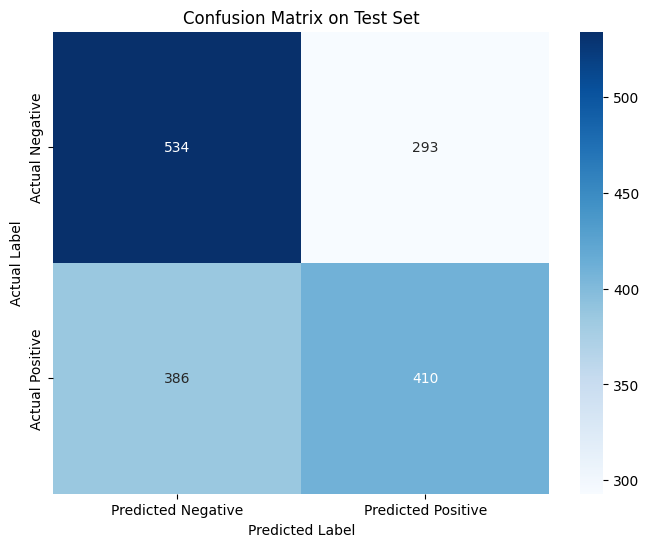

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select the same important features from the test set
X_test_important = X_test[important_feature_names]

# Scale the features of the test set using the previously fitted scaler
X_test_important_scaled = scaler.transform(X_test_important)

# Predict the outcomes on the test set using the final model
y_pred_test = logreg_final.predict(X_test_important_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred_test, target_names=['Negative', 'Positive'])

# Output the classification report
print("Classification Report on Test Set:")
print(report)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

### Conclusion on Feature Elimination

After extensive testing with various thresholds for feature importance, we observed that feature elimination did not  enhance the performance of our Logistic Regression model at all. 
This outcome suggests that the inherent simplicity of the logistic regression, while providing valuable insights and ease of interpretation, was insufficient to capture the complex patterns present in our cryptocurrency news dataset.

The results underscore the limitations of logistic regression for this particular application. It is clear that despite its advantages, logistic regression may not always be the optimal choice for datasets with intricate relationships and complex structures.

In our next `ML_CryptoNews_Models` notebook, we are going to explore a range of more sophisticated machine learning techniques, including Random Forest, Gradient Boosting Machines (GBM), Support Vector Machines (SVM), and Deep Neural Networks (DNN).